In [1]:
from sklearn.externals import joblib
x_train, x_test, y_train, y_test = joblib.load('dataset.pkl')

In [2]:
clf = joblib.load('ann_model.pkl')

In [3]:
expected, predicted = y_test, clf.predict(x_test)

from sklearn.metrics import classification_report
report = classification_report(expected, predicted)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.99202127659574468

In [5]:
clf.best_params_

{'activation': 'logistic', 'learning_rate_init': 0.001, 'momentum': 0.5}

In [6]:
clf.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.5,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [7]:
import pandas as pd
dataframe = pd.DataFrame(clf.cv_results_)
dataframe.to_csv('ann_cross_validation.csv')

with open('ann_precision_recall.csv', 'w') as output:
    output.write(report)

In [8]:
import numpy as np

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf.best_estimator_, x_train + x_test, y_train + y_test, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))

/home/mihai/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/mihai/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/mihai/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


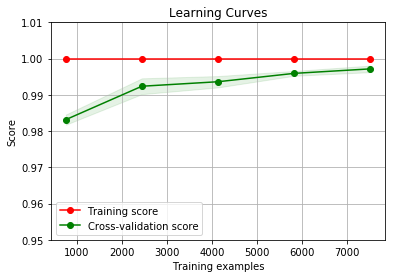

In [9]:
from learning_curve import plot_learning_curve
plot_learning_curve('Learning Curves', train_sizes, train_scores, test_scores, ylim=(0.95, 1.01))